In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [7]:
raw_data = pd.read_csv('winequality-red.csv')
raw_data.shape  # 1599 * 11  

(1599, 12)

In [14]:
raw_data.dropna().shape

(1599, 12)

In [46]:
label_count = list(set(raw_data.iloc[:,-1]))  # {3,4,5,6,7,8}

In [20]:
raw_data.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


# Task: we have given 11 features of a Wine with their quality. We have to find which features are good for good wine quality. i.e if the quality of some wine is greater then the threshold value it means that features are good otherwise bad

# 1. Preprocessing

In [34]:
cut = int(raw_data.shape[0]*.75)

train_data = raw_data.iloc[:cut,:]
train_features = train_data.iloc[:,:-1]
train_labels = train_data['quality']
train_features_columns = train_features.columns

test_data = raw_data.iloc[cut:,:]
test_features = test_data.iloc[:,:-1]
test_labels = test_data['quality']
test_features_columns = test_features.columns


# 2. Normalizing

In [45]:
train_features = train_features   / (np.mean(train_features))
test_features = test_features / np.mean(test_features)

# 3. One Hot Encoding

In [106]:
train_labels_hot_encode = pd.get_dummies(train_labels)
test_labels_hot_encode = pd.get_dummies(test_labels)

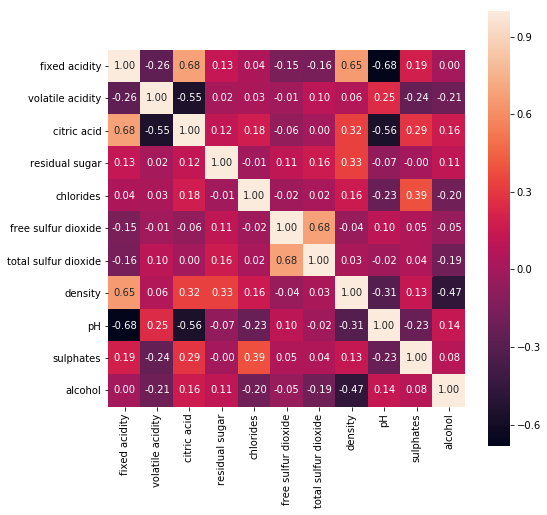

In [90]:
plt.figure(figsize=(8,8))
sns.heatmap(train_features.corr() ,square=True ,  annot=True , fmt='.2f' )
plt.show()

C:\Users\GirrajJangid\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


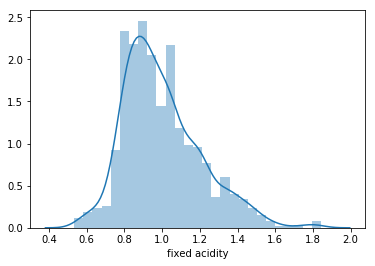

C:\Users\GirrajJangid\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


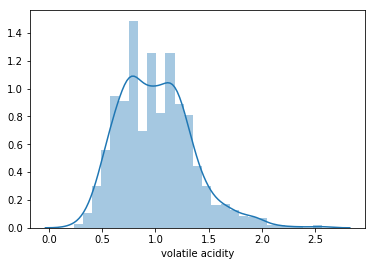

C:\Users\GirrajJangid\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


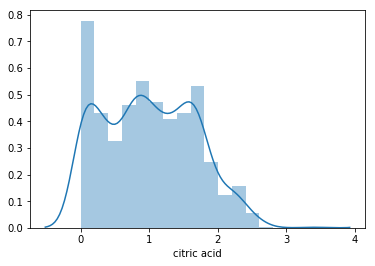

C:\Users\GirrajJangid\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


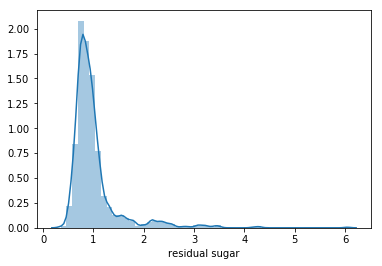

C:\Users\GirrajJangid\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


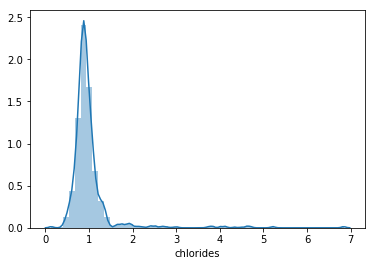

C:\Users\GirrajJangid\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


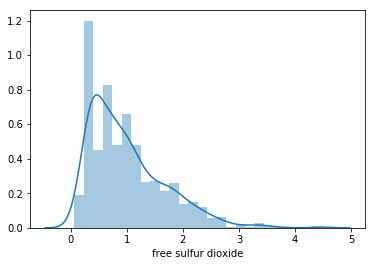

C:\Users\GirrajJangid\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


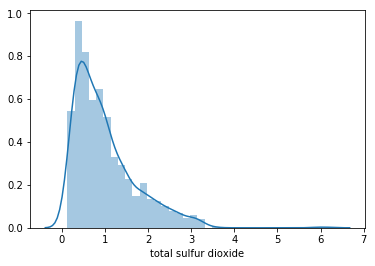

C:\Users\GirrajJangid\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


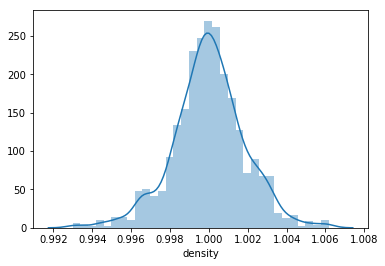

C:\Users\GirrajJangid\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


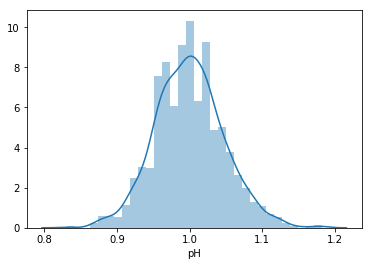

C:\Users\GirrajJangid\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


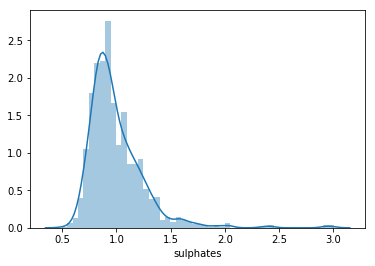

C:\Users\GirrajJangid\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


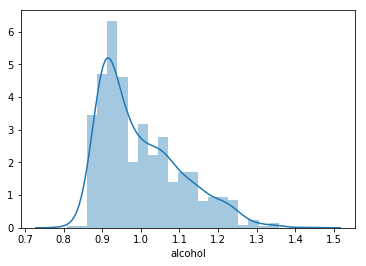

In [91]:
for i in train_features:
    sns.distplot(train_features[i])
    plt.show()

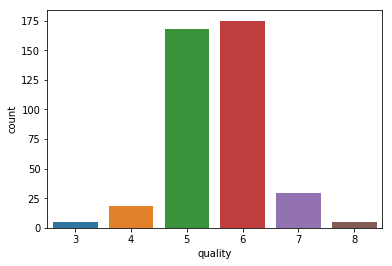

In [99]:
sns.countplot(test_labels)

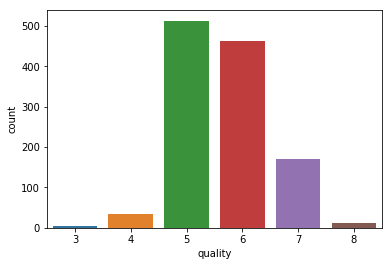

In [107]:
sns.countplot(train_labels)

# approx. both have same amount of data

softmax function: $$P\left(y^{(i)}=k | x^{(i)} ; \theta\right)=\frac{\exp \left(\theta^{(k) \top} x^{(i)}\right)}{\sum_{j=1}^{K} \exp \left(\theta^{(j) \top} x^{(i)}\right)}$$

cost function:  $$
J(\theta)=-\frac{1}{m} \sum_{i=1}^{m}\left[y^{i} \log \left(h_{\theta}\left(x^{i}\right)\right)+\left(1-y^{i}\right) \log \left(1-h_{\theta}\left(x^{i}\right)\right)\right]
$$

$$\nabla_{\theta^{(k)}} J(\theta)=-\sum_{i=1}^{m}\left[x^{(i)}\left(1\left\{y^{(i)}=k\right\}-P\left(y^{(i)}=k | x^{(i)} ; \theta\right)\right)\right]$$

In [245]:
def softmax(theta0 , theta , features):
    exp = np.exp(theta0 + np.dot(features , theta))  # observation * labels 1 columns for each decision boundary    
    sum_denominator = np.sum((exp) , axis=1)
    s = list(map(lambda i : exp[:,i] / sum_denominator ,  np.arange(len(label_count))))
    return np.array(s).T  # observation * labels = probability of each value in their class wise

def cost_function(theta0 , theta , features , labels):
    return -(np.sum(np.matmul( np.log(softmax(theta0 , theta , features)).T  , labels )) / features.shape[0])


In [246]:
alpha = 0.001
epsilon = 0.00001

initial_theta0 = np.random.randn(1 , len(label_count))  # 1 * no. of labels 1 theta for each class
initial_theta = np.random.randn(train_features.shape[1] , len(label_count))  # features * labels 

i = 1
itera = []
fc = []

while True:
    del_theta0 = np.sum(softmax(initial_theta0 , initial_theta , train_features)  - np.array(train_labels_hot_encode) , axis=0) / train_features.shape[0]
    del_theta = np.sum(np.matmul(train_features.T ,(softmax(initial_theta0 , initial_theta , train_features)  - np.array(train_labels_hot_encode)) ),axis = 0) / train_features.shape[0]
    
    final_theta0 = initial_theta0 - alpha * del_theta0
    final_theta  = initial_theta - alpha  * del_theta

    initial_cost = cost_function(initial_theta0 , initial_theta , train_features , train_labels_hot_encode)
    final_cost   = cost_function(final_theta0 , final_theta , train_features , train_labels_hot_encode)

    print('{} Average Negative Log : {}'.format(i , final_cost))
    i+=1
    itera.append(i)
    fc.append(final_cost)
    initial_theta0 = final_theta0
    initial_theta = final_theta
    if(abs(final_cost - initial_cost)) < epsilon:
        break
    


1 Average Negative Log : 41.00926262351626
2 Average Negative Log : 40.57029087988795
3 Average Negative Log : 40.132764522032325
4 Average Negative Log : 39.69680377046567
5 Average Negative Log : 39.26253668909683
6 Average Negative Log : 38.83009895944979
7 Average Negative Log : 38.39963336410294
8 Average Negative Log : 37.97128898882837
9 Average Negative Log : 37.54522022775616
10 Average Negative Log : 37.12158575416931
11 Average Negative Log : 36.70054766517839
12 Average Negative Log : 36.2822709865021
13 Average Negative Log : 35.86692362533552
14 Average Negative Log : 35.454676717506395
15 Average Negative Log : 35.04570519035027
16 Average Negative Log : 34.64018830754473
17 Average Negative Log : 34.23830999073945
18 Average Negative Log : 33.840258799008836
19 Average Negative Log : 33.446227547153505
20 Average Negative Log : 33.05641262226582
21 Average Negative Log : 32.6710130999777
22 Average Negative Log : 32.2902297706272
23 Average Negative Log : 31.91426417298

183 Average Negative Log : 18.97857745156779
184 Average Negative Log : 18.96179748023297
185 Average Negative Log : 18.9451816491257
186 Average Negative Log : 18.9287313198919
187 Average Negative Log : 18.912447817113424
188 Average Negative Log : 18.89633242748471
189 Average Negative Log : 18.880386399009616
190 Average Negative Log : 18.86461094021884
191 Average Negative Log : 18.8490072194087
192 Average Negative Log : 18.833576363901955
193 Average Negative Log : 18.818319459331367
194 Average Negative Log : 18.80323754894697
195 Average Negative Log : 18.7883316329478
196 Average Negative Log : 18.773602667839167
197 Average Negative Log : 18.759051565816275
198 Average Negative Log : 18.744679194175312
199 Average Negative Log : 18.73048637475295
200 Average Negative Log : 18.716473883395214
201 Average Negative Log : 18.702642449456818
202 Average Negative Log : 18.688992755331903
203 Average Negative Log : 18.67552543601719
204 Average Negative Log : 18.662241078708437
205

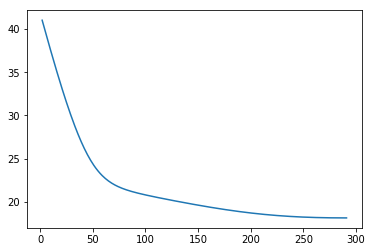

In [247]:
plt.plot(itera , fc)

In [259]:
softmax(final_theta0 , final_theta , train_features)


array([[0.01478868, 0.02302059, 0.11633591, 0.68012446, 0.12925759,
        0.03647276],
       [0.00767859, 0.017532  , 0.24512372, 0.40385225, 0.19165957,
        0.13415387],
       [0.01326289, 0.01403264, 0.29114829, 0.47249424, 0.14451241,
        0.06454952],
       ...,
       [0.00675851, 0.01036494, 0.47311462, 0.20272371, 0.17689828,
        0.13013993],
       [0.03381629, 0.06774837, 0.12761762, 0.66092387, 0.10127465,
        0.0086192 ],
       [0.00858441, 0.00531466, 0.46498551, 0.30785578, 0.14096659,
        0.07229304]])